In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [4]:
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

MNIST data from openml is shuffled

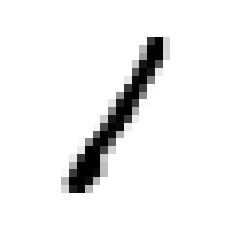

labelled as 1


In [6]:
r=random.randint(0,len(X))
some_digit=X[r]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
some_digit_label=y[r]
print('labelled as',some_digit_label)

In [7]:
X_train, X_test, y_train, y_test = X[:56000], X[56000:], y[:56000], y[56000:]

# Multilevel Classifier

SGD classifier

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

In [9]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([1], dtype=int8)

In [10]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-380576.39122034,   96088.57474268, -126785.35692632,
        -174784.36511869, -377650.36774498, -185908.23284212,
        -261020.81580317, -368255.25437237,  -63533.55274418,
        -371883.60174942]])

In [11]:
np.argmax(some_digit_scores)

1

Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

In [13]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([1], dtype=int8)

In [14]:
forest_clf.predict_proba([some_digit])

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Model Selection

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

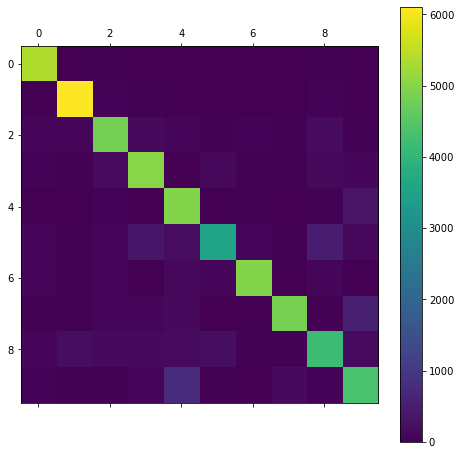

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx_sgd = confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(conf_mx_sgd)

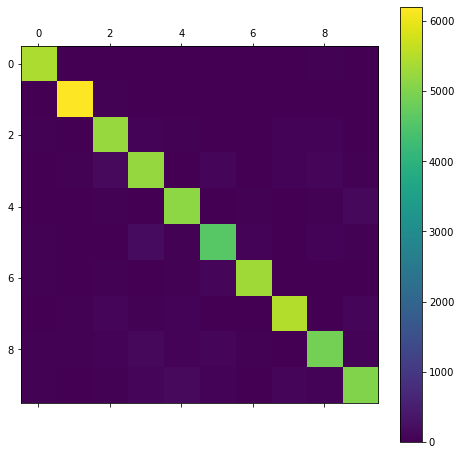

In [19]:
y_train_pred2 = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx_forest = confusion_matrix(y_train, y_train_pred2)
plot_confusion_matrix(conf_mx_forest)

### Random Forest Classifier confusion matrix shows much better recall and precision for all classes 0-9